[![house-in-lagos.jpg](https://i.postimg.cc/0NyZtLGm/house-in-lagos.jpg)](https://postimg.cc/pm3Drc6X)

Image credit: [Nigeria Property Centre](https://nigeriapropertycentre.com) 

In [1]:
import numpy as np
import pandas as pd
import re
import os

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from typing import List

#### Merge all the data

In [2]:
data0 = pd.read_csv('data/house_data0.csv')
data0.head()

,title,address,bed,bath,toilet,pkn_space,price
0,4 bedroom detached duplex for sale,"Megamound Estate, Lekki County Homes., Ikota, ...",4Bedrooms,5Bathrooms,5Toilets,Save,"75,000,000"
1,4 bedroom semi-detached duplex for sale,"In A Well Secured Estate, Ajah, Lagos",4Bedrooms,4Bathrooms,5Toilets,2Parking Spaces,"47,000,000"
2,5 bedroom semi-detached duplex for sale,"In A Well Secured Estate, Ajah, Lagos",5Bedrooms,4Bathrooms,6Toilets,4Parking Spaces,"80,000,000"
3,3 bedroom detached duplex for sale,"Ikola Road, By Command., Alagbado, Ifako-Ijaiy...",3Bedrooms,Save,NaN,NaN,"27,500,000"
4,3 bedroom terraced duplex for sale,"2nd Tollgate, Lekki, Lagos",3Bedrooms,3Bathrooms,4Toilets,Save,"45,000,000"


In [3]:
data0.shape

(1050, 7)

In [4]:
files = [file for file in os.listdir('data/')]

files

['house_data0.csv',
 'house_data1.csv',
 'house_data2.csv',
 'house_data3.csv',
 'house_data4.csv']

In [5]:
all_df = pd.DataFrame()  # empty dataframe

print(f"Before concatenatiion: {all_df.shape} \n")

for file in files:
    df = pd.read_csv(f'data/{file}')
    all_df = pd.concat([all_df, df], axis='index')
    
print(f"After concatenatiion: {all_df.shape} \n")

Before concatenatiion: (0, 0) 

After concatenatiion: (10700, 7) 



In [6]:
all_df.head()

,title,address,bed,bath,toilet,pkn_space,price
0,4 bedroom detached duplex for sale,"Megamound Estate, Lekki County Homes., Ikota, ...",4Bedrooms,5Bathrooms,5Toilets,Save,"75,000,000"
1,4 bedroom semi-detached duplex for sale,"In A Well Secured Estate, Ajah, Lagos",4Bedrooms,4Bathrooms,5Toilets,2Parking Spaces,"47,000,000"
2,5 bedroom semi-detached duplex for sale,"In A Well Secured Estate, Ajah, Lagos",5Bedrooms,4Bathrooms,6Toilets,4Parking Spaces,"80,000,000"
3,3 bedroom detached duplex for sale,"Ikola Road, By Command., Alagbado, Ifako-Ijaiy...",3Bedrooms,Save,NaN,NaN,"27,500,000"
4,3 bedroom terraced duplex for sale,"2nd Tollgate, Lekki, Lagos",3Bedrooms,3Bathrooms,4Toilets,Save,"45,000,000"


### Clean the data.

In [7]:
# adjust pandas display settings
pd.set_option('max_colwidth', 100)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10700 entries, 0 to 3599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      10700 non-null  object
 1   address    10700 non-null  object
 2   bed        10635 non-null  object
 3   bath       10700 non-null  object
 4   toilet     9890 non-null   object
 5   pkn_space  9670 non-null   object
 6   price      10700 non-null  object
dtypes: object(7)
memory usage: 668.8+ KB


In [8]:
def get_address(addr: str) -> str:
    """ 
    ====================================================================
        Extract the address.
    """
    result = addr.split(',')[-2:-1]  # select the city
    result = [x.strip() for x in result]  # remove the white spaces
    result = ', '.join(result)  # join on spaces (no longer a list)
    return result


def clean_text(text: str) -> str:
    """
    ====================================================================
        Clean the text.
    """
    pattern = r"\D+"  # non-digits
    result = re.sub(pattern, '', text, flags=re.I)
    return result

In [9]:
### drop the missing values
all_df1 = all_df.copy()
all_df1 = all_df1.dropna()

In [10]:
# clean the data
all_df1['address'] = all_df1['address'].apply(get_address)
all_df1['bed'] = all_df1['bed'].apply(clean_text)
all_df1['bath'] = all_df1['bath'].apply(clean_text)
all_df1['toilet'] = all_df1['toilet'].apply(clean_text)
all_df1['pkn_space'] = all_df1['pkn_space'].apply(clean_text)
all_df1['price'] = all_df1['price'].apply(clean_text)

# conert to numeric data type
for col in ['bed', 'bath', 'toilet', 'pkn_space', 'price']:
    all_df1[col] = pd.to_numeric(all_df1[col])


all_df1.head()

,title,address,bed,bath,toilet,pkn_space,price
0,4 bedroom detached duplex for sale,Lekki,4,5,5,NaN,75000000
1,4 bedroom semi-detached duplex for sale,Ajah,4,4,5,2.0,47000000
2,5 bedroom semi-detached duplex for sale,Ajah,5,4,6,4.0,80000000
4,3 bedroom terraced duplex for sale,Lekki,3,3,4,NaN,45000000
5,5 bedroom detached duplex for sale,Lekki,5,5,6,NaN,165000000


#### Univariate Analysis

In [11]:
# save the data
all_df1.to_csv('all_data.csv', index=False)

In [12]:
all_df1.isna().sum() / len(all_df1)

title        0.000000
address      0.000000
bed          0.000000
bath         0.000000
toilet       0.000000
pkn_space    0.300931
price        0.000000
dtype: float64

In [13]:
# drop 'pkn_space'
all_df1 = all_df1.drop(columns=['pkn_space'])

In [14]:
all_df1.describe()

,bed,bath,toilet,price
count,9670.000000,9670.000000,9670.000000,9.670000e+03
mean,4.389349,4.597208,8.517580,1.730089e+08
std,2.105136,2.400704,66.788159,4.399776e+08
min,1.000000,1.000000,1.000000,1.200000e+06
25%,4.000000,4.000000,5.000000,5.800000e+07
50%,4.000000,4.000000,5.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,1.600000e+08
max,72.000000,72.000000,2500.000000,1.650000e+10


* The max number of bathrooms, toilets, parking space, and max price is extremely outragious. 
* It may be a hotel!

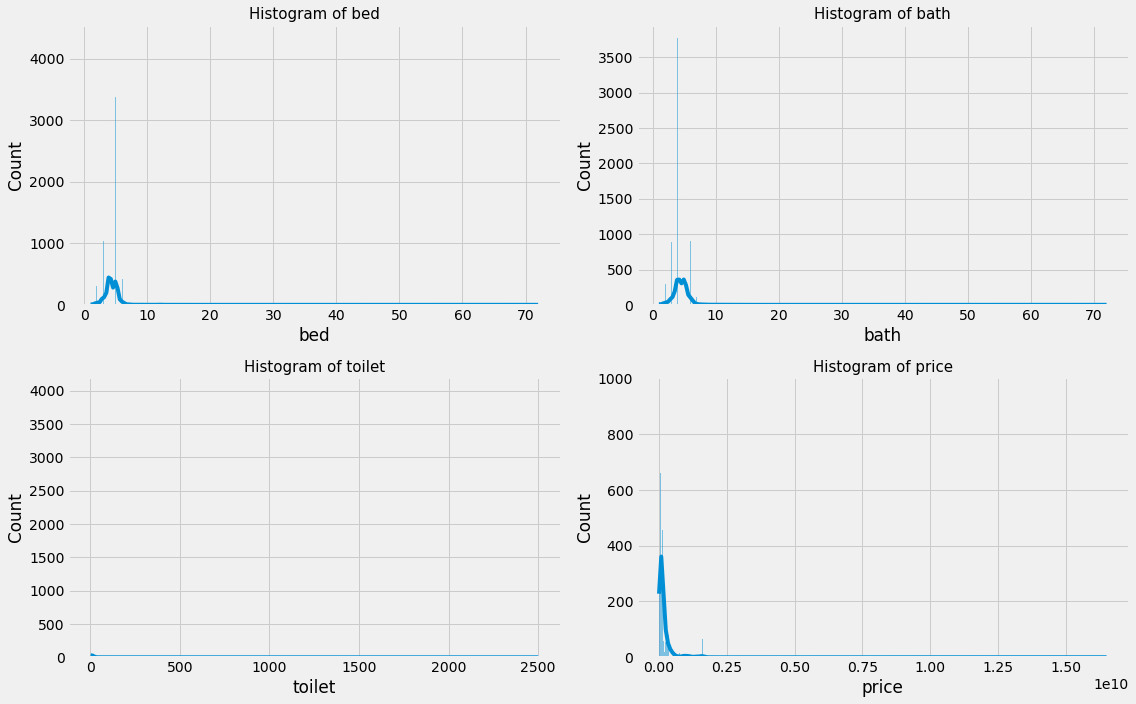

In [15]:
# list containing the numerical features
num_col = all_df1.select_dtypes(exclude='O').columns.to_list()

n_rows, n_cols = 2, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_rows * 8 , n_cols * 5))

for idx, col in enumerate(num_col):
    ax = axs[(idx // n_cols), (idx % n_cols)]
    sns.histplot(x=col, data=all_df1, ax=ax, kde=True)
    ax.set_title(f"Histogram of {col}", size=15)
    
fig.tight_layout()
plt.show()

* The features do not follow a Gaussian distribution.
* Remove the outliers using the interquartile range.

In [16]:
all_df2 = all_df1.copy()

# filter out houses with toilets above the 7
all_df2 = all_df2.loc[(all_df2['toilet'] > 1) & (all_df2['toilet'] < 8)]

# filter out houses with bath above the 7
all_df2 = all_df2.loc[(all_df2['bath'] > 1) & (all_df2['bath'] < 8)]

In [17]:
def cal_outliers(value: str, df: pd.DataFrame) -> List:
    """
    ====================================================================
    Calculate the range of values that are not outliers.
    """    
    
    q1 = np.percentile(df[value], 25)
    q3 = np.percentile(df[value], 75)

    iqr = q3 - q1
    val_range = [q1 - (1.5 * iqr), q3 + (1.5 * iqr)]
    
    return val_range

In [18]:
outliers = cal_outliers('price', all_df2)
outliers

[-87500000.0, 300500000.0]

In [19]:
# filter out values above the upper boundary of 'outliers'
all_df2 = all_df2.loc[all_df2['price'] <= outliers[1]]

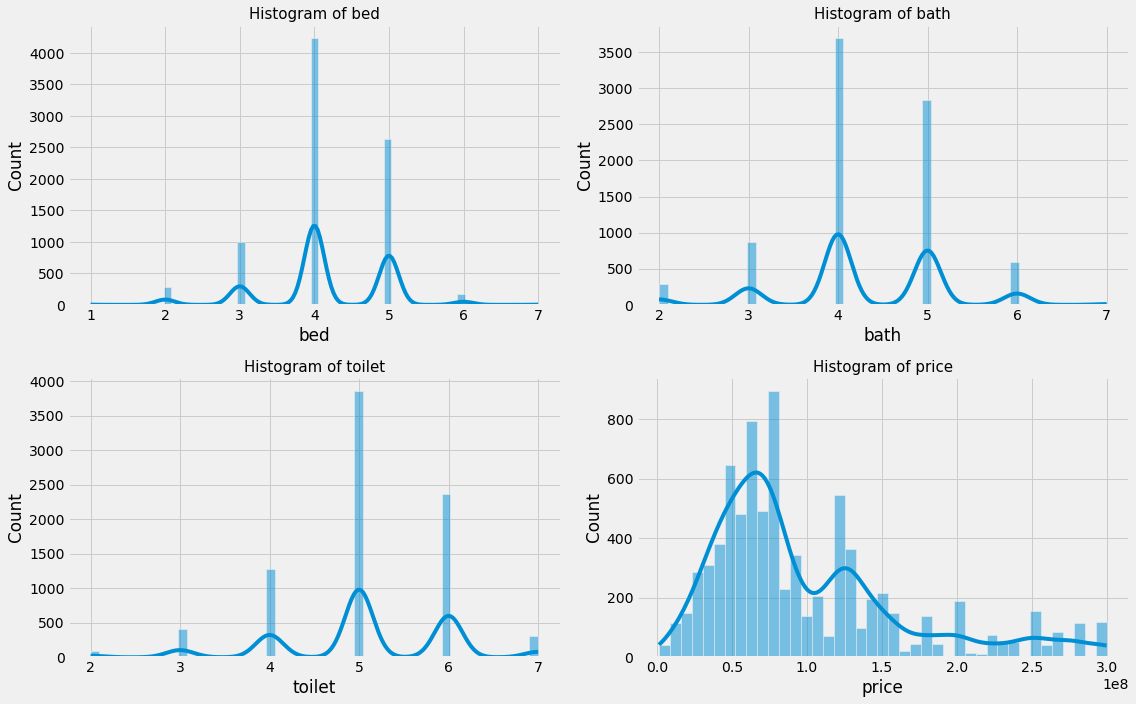

In [20]:
n_rows, n_cols = 2, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_rows * 8 , n_cols * 5))

for idx, col in enumerate(num_col):
    ax = axs[(idx // n_cols), (idx % n_cols)]
    sns.histplot(x=col, data=all_df2, ax=ax, kde=True)
    ax.set_title(f"Histogram of {col}", size=15)
    
fig.tight_layout()
plt.show()

In [21]:
all_df2.head()

,title,address,bed,bath,toilet,price
0,4 bedroom detached duplex for sale,Lekki,4,5,5,75000000
1,4 bedroom semi-detached duplex for sale,Ajah,4,4,5,47000000
2,5 bedroom semi-detached duplex for sale,Ajah,5,4,6,80000000
4,3 bedroom terraced duplex for sale,Lekki,3,3,4,45000000
5,5 bedroom detached duplex for sale,Lekki,5,5,6,165000000


In [22]:
addr_count = pd.crosstab(index=all_df2['address'], columns='Count').apply(lambda x: x.sort_values(ascending=False))
addr_count.columns = ['Count']  # rename column
addr_count = addr_count.reset_index()  
addr_count.head(8)

,address,Count
0,Lekki,5485
1,Ajah,935
2,Ikeja,425
3,Ikoyi,280
4,Victoria Island (VI),230
5,Ibeju Lekki,210
6,Isheri North,120
7,Magodo,90


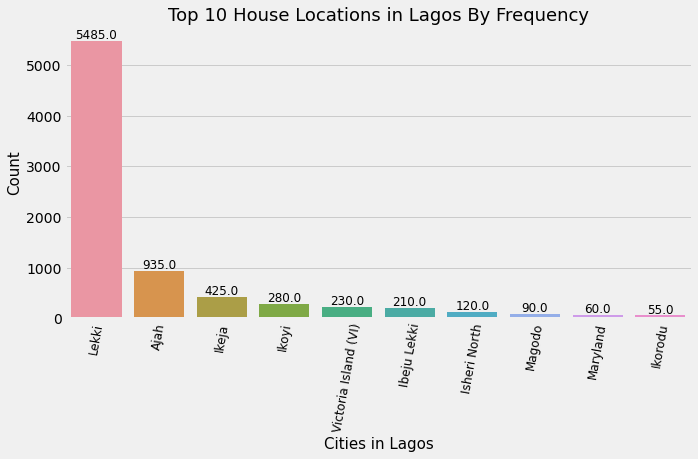

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

fig = sns.barplot(x='address', y='Count', data=addr_count[:10])
plt.xlabel('Cities in Lagos', size=15)
plt.tick_params(axis='x', labelsize=12, labelrotation=80)
plt.ylabel('Count', size=15)
plt.title('Top 10 House Locations in Lagos By Frequency', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=y,                             # text pos
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=12,                            # text size
                textcoords='offset points')         # text coordinates???

plt.show()

#### Multivariate Analysis

In [24]:
grpby_bed = all_df2.groupby(['bed'])[['price']].agg(['median']).apply(lambda x: x.sort_values(ascending=False))
grpby_bed.columns = ['Price(median)']

grpby_bed

,Price(median)
bed,
6,140000000.0
5,130000000.0
4,70000000.0
7,40000000.0
3,39500000.0
2,25500000.0
1,18850004.5


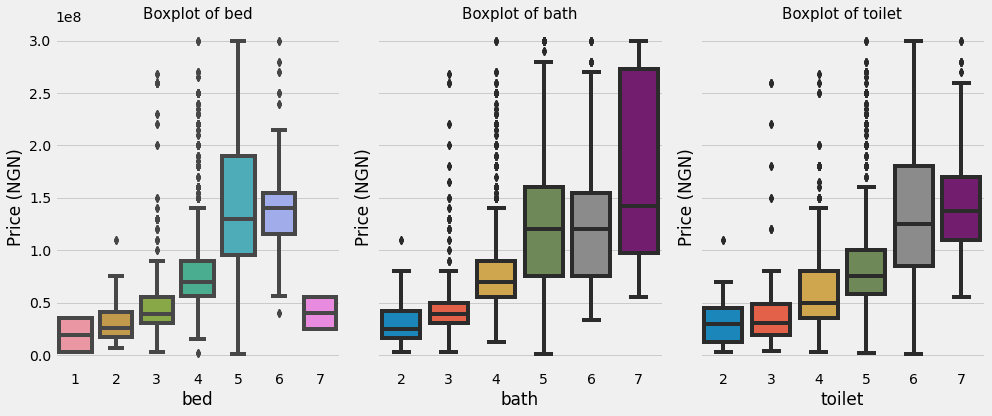

In [25]:
n_rows, n_cols = 1, 3
fig, axs = plt.subplots(n_rows, n_cols, sharey=True, figsize=(14 , 6))


for idx, col in enumerate(['bed', 'bath', 'toilet']):
    ax = axs[idx]
    sns.boxplot(x=col, y='price',data=all_df2, ax=ax)
    ax.set_ylabel('Price (NGN)')
    ax.set_title(f"Boxplot of {col}", size=15)
    
fig.tight_layout()
plt.show()

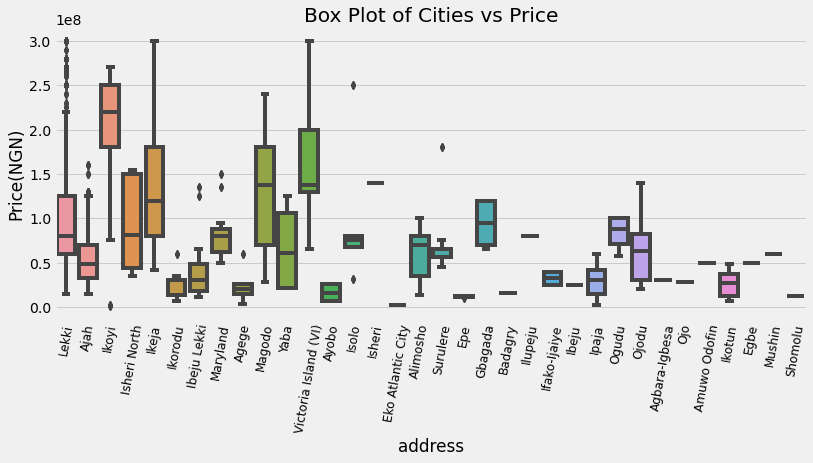

In [26]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='address', y='price',data=all_df2)
plt.tick_params(axis='x', labelsize=12, labelrotation=80)
plt.ylabel('Price(NGN)')
plt.title('Box Plot of Cities vs Price')

plt.show()

* There are still outliers in the data.
* Generally, it appears that as the facilities in a house increases, the median price also increases.
* It also appears that the price of houses vary based on the location.

In [27]:
all_df2.head(8)

,title,address,bed,bath,toilet,price
0,4 bedroom detached duplex for sale,Lekki,4,5,5,75000000
1,4 bedroom semi-detached duplex for sale,Ajah,4,4,5,47000000
2,5 bedroom semi-detached duplex for sale,Ajah,5,4,6,80000000
4,3 bedroom terraced duplex for sale,Lekki,3,3,4,45000000
5,5 bedroom detached duplex for sale,Lekki,5,5,6,165000000
6,3 bedroom terraced duplex for sale,Lekki,3,3,4,40000000
7,4 bedroom detached duplex for sale,Lekki,4,5,5,75000000
8,4 bedroom semi-detached duplex for sale,Ajah,4,4,5,47000000


In [28]:
# Preprocess the features
from sklearn.preprocessing import LabelEncoder

In [41]:
all_df3 = all_df2.copy()

# encode the address
le_address = LabelEncoder()
all_df3['address'] = le_address.fit_transform(all_df3['address'])

all_df3.head(8)

,title,address,bed,bath,toilet,price
0,4 bedroom detached duplex for sale,23,4,5,5,75000000
1,4 bedroom semi-detached duplex for sale,2,4,4,5,47000000
2,5 bedroom semi-detached duplex for sale,2,5,4,6,80000000
4,3 bedroom terraced duplex for sale,23,3,3,4,45000000
5,5 bedroom detached duplex for sale,23,5,5,6,165000000
6,3 bedroom terraced duplex for sale,23,3,3,4,40000000
7,4 bedroom detached duplex for sale,23,4,5,5,75000000
8,4 bedroom semi-detached duplex for sale,2,4,4,5,47000000


In [42]:
# transform the price
all_df3['price'] = all_df3['price'].apply(lambda price: np.log10(price + 1))

outliers = cal_outliers('price', all_df3)

all_df3 = all_df3.loc[all_df3['price'] > outliers[0]]

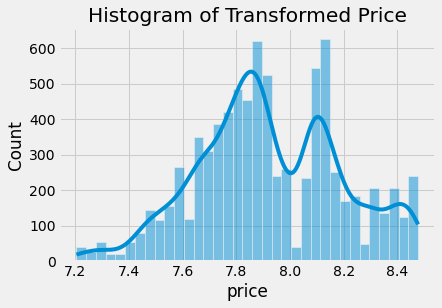

In [43]:

# all_df3['price'] = all_df3['price'].apply(lambda price: np.sqrt(price))

sns.histplot(x='price', data=all_df3, kde=True)
plt.title('Histogram of Transformed Price')

plt.show()

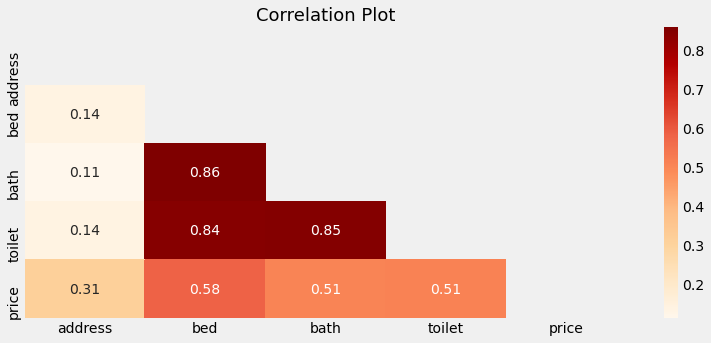

In [44]:
### Correlation Plot
plt.figure(figsize=(12, 5))

corr_matrix = all_df3.corr()
mask = np.triu(corr_matrix)
sns.heatmap(data=corr_matrix, mask=mask, annot=True, cmap='OrRd')
plt.title('Correlation Plot', size=18)

plt.show()

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [49]:
X = all_df3.drop(columns=['title', 'price'])
y = all_df3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [54]:
models = {
    'lin_model': LinearRegression(),
    'lasso_model': Lasso(random_state=123),
    'ridge_model': Ridge(random_state=123),
    'rf_model': RandomForestRegressor(random_state=123),
    'ada_boost': AdaBoostRegressor(random_state=123),
    'svr': SVR(),
}

for name, estimator in models.items():
    # fit 
    estimator.fit(X_train, y_train)
    
    # make predictions
    y_pred = estimator.predict(X_test)
    
    # metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"\n\tEstimator: {name}\nRoot_mean_squared_error: {rmse} ")
    print("==" * 25)


	Estimator: lin_model
Root_mean_squared_error: 0.21126188643494911 

	Estimator: lasso_model
Root_mean_squared_error: 0.26822692632462336 

	Estimator: ridge_model
Root_mean_squared_error: 0.21125825548605973 

	Estimator: rf_model
Root_mean_squared_error: 0.15677023278094154 

	Estimator: ada_boost
Root_mean_squared_error: 0.19317885535043547 

	Estimator: svr
Root_mean_squared_error: 0.19521375521250212 
